In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.naive_bayes import BernoulliNB
os.getcwd()
os.chdir('/Users/kylehoward/desktop/thinkful') 
os.getcwd()

'/Users/kylehoward/Desktop/Thinkful'

In [40]:
# Dataframe containing hotel reviews from Las Vegas. Also setting graph style
data_path = ("LasVegasTripAdvisorReviews-Dataset.csv")
df = pd.read_csv(data_path, header=None)
df.dropna()
df.columns = ['User_country', 'Nr_reviews', 'Nr_hotel_reviews', 'Helpful_votes', 'Score', 'Period_of_stay', 
                       'Traveler_type', 'Pool', 'Gym', 'Tennis_court', 'Spa', 'Casino', 'Free_internet', 'Hotel_name', 
                      'Hotel_stars', 'Nr_rooms', 'User_continent', 'Member_years', 'Review_month', 'Review_weekday'] 
sns.set_style("white")
df.head(10)

,User_country,Nr_reviews,Nr_hotel_reviews,Helpful_votes,Score,Period_of_stay,Traveler_type,Pool,Gym,Tennis_court,Spa,Casino,Free_internet,Hotel_name,Hotel_stars,Nr_rooms,User_continent,Member_years,Review_month,Review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
5,Canada,31,8,27,3,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,March,Tuesday
6,UK,45,12,46,4,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,4,April,Friday
7,USA,2,1,4,4,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,0,April,Tuesday
8,India,24,3,8,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Asia,3,May,Saturday
9,Canada,12,7,11,3,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,5,May,Tuesday


In [25]:
df.describe()

,Nr_reviews,Nr_hotel_reviews,Helpful_votes,Score,Hotel_stars,Nr_rooms
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,4.047619,2057.571429
std,74.996426,23.957953,48.520783,1.007302,0.844650,1454.428397
min,1.000000,0.000000,0.000000,1.000000,3.000000,5.000000
25%,12.000000,5.000000,8.000000,4.000000,3.000000,716.000000
50%,23.500000,9.000000,16.000000,4.000000,4.000000,2700.000000
75%,54.250000,18.000000,35.000000,5.000000,5.000000,3025.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000


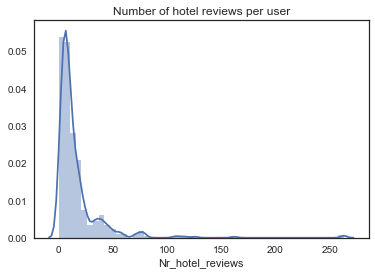

In [123]:
# Viewing nuber of hotel reviews per user. Maybe users who review more frequently behave differently then those 
# who review more casually
sns.plt.title('Number of hotel reviews per user')
sns.distplot(df['Nr_hotel_reviews'])

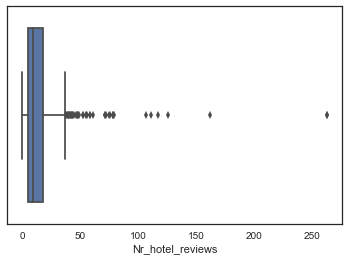

In [29]:
sns.boxplot(df['Nr_hotel_reviews'])

In [30]:
df.Nr_hotel_reviews.describe()

count    504.000000
mean      16.023810
std       23.957953
min        0.000000
25%        5.000000
50%        9.000000
75%       18.000000
max      263.000000
Name: Nr_hotel_reviews, dtype: float64

In [119]:
# Creating a feature that differentiates the users who have reviewed above one standard deviation from the mean from 
# our population sample
df['Average_consumer'] = np.where(df['Nr_hotel_reviews']<=40, 1, 0)
average = df['Average_consumer']
average_converted = []
for a in average:
    if a == 1:
        a = 'average'
        average_converted.append(a)
    elif a == 0:
        a = 'above'
        average_converted.append(a)
df['Average_consumer'] = average_converted

print(df['Score'].groupby(df['Average_consumer']).describe())

                  count      mean       std  min  25%  50%  75%  max
Average_consumer                                                    
above              40.0  4.125000  0.757442  3.0  4.0  4.0  5.0  5.0
average           464.0  4.122845  1.026641  1.0  4.0  4.0  5.0  5.0


In [120]:
# Creating a feature that differentiates the users who have reviewed above the mean from our population sample
df['Below_mean_review_consumer'] = np.where(df['Nr_hotel_reviews']<16, 1, 0)
below_average = df['Below_mean_review_consumer']
below_average_converted = []
for b in below_average:
    if b == 1:
        b = 'above_mean'
        below_average_converted.append(b)
    elif b == 0:
        b = 'below_mean'
        below_average_converted.append(b)
df['Below_mean_review_consumer'] = below_average_converted
print(df['Score'].groupby(df['Below_mean_review_consumer']).describe())

                            count      mean       std  min  25%  50%  75%  max
Below_mean_review_consumer                                                    
above_mean                  355.0  4.140845  1.029176  1.0  4.0  4.0  5.0  5.0
below_mean                  149.0  4.080537  0.955191  1.0  4.0  4.0  5.0  5.0


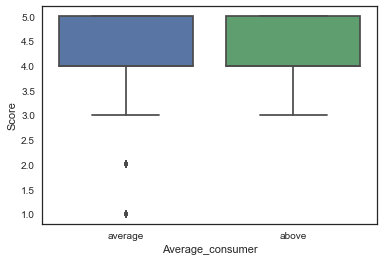

In [121]:
x = df['Average_consumer']
y = df['Score']
sns.boxplot(x,y)

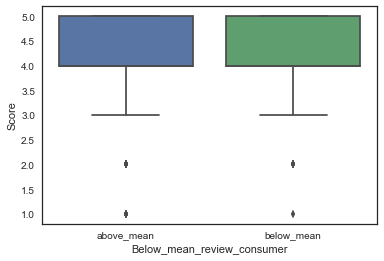

In [122]:
a = df['Below_mean_review_consumer']
b = df['Score']
sns.boxplot(a,b)

In [42]:
# Creating a feature that measures scores below 3
df['Low_rate'] = np.where(df['Score']<=2.5, 1, 0)

print(df['Score'].groupby(df['Low_rate']).describe())

          count      mean       std  min  25%  50%  75%  max
Low_rate                                                    
0         463.0  4.334773  0.731348  3.0  4.0  4.0  5.0  5.0
1          41.0  1.731707  0.448575  1.0  1.0  2.0  2.0  2.0


In [44]:
df.Score.describe()

count    504.000000
mean       4.123016
std        1.007302
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Score, dtype: float64

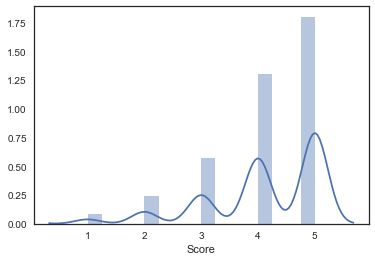

In [45]:
sns.distplot(df['Score'])

In [48]:
# Seeing how the ratings were distributed among hotels
print(df['Score'].groupby(df['Hotel_name']).describe())

                                                    count      mean       std  \
Hotel_name                                                                      
Bellagio Las Vegas                                   24.0  4.208333  1.020621   
Caesars Palace                                       24.0  4.125000  1.190999   
Circus Circus Hotel & Casino Las Vegas               24.0  3.208333  1.102533   
Encore at wynn Las Vegas                             24.0  4.541667  0.931533   
Excalibur Hotel & Casino                             24.0  3.708333  0.806450   
Hilton Grand Vacations at the Flamingo               24.0  3.958333  0.999094   
Hilton Grand Vacations on the Boulevard              24.0  4.166667  1.129319   
Marriott's Grand Chateau                             24.0  4.541667  0.588230   
Monte Carlo Resort&Casino                            24.0  3.291667  1.041703   
Paris Las Vegas                                      24.0  4.041667  1.041703   
The Cosmopolitan Las Vegas  

In [127]:
# Creating a feature that differentiates between hotels whose bottom 25% reviews are three or less because their means
# have not regressed back to the sample mean as quickly as the other hotels
df['Low_ranking'] = np.where((df['Hotel_name'].isin(['Circus Circus Hotel & Casino Las Vegas', 
                                                     'Monte Carlo Resort&Casino', 'Hilton Grand Vacations at the Flamingo', 'Excalibur Hotel & Casino', 'The Westin las Vegas Hotel Casino & Spa', 'Tuscany Las Vegas Suites & Casino'  ])), 1, 0)



In [128]:
print(df['Score'].groupby(df['Low_ranking']).describe())

             count      mean       std  min  25%  50%   75%  max
Low_ranking                                                     
0            360.0  4.286111  0.958077  1.0  4.0  5.0  5.00  5.0
1            144.0  3.715278  1.015015  1.0  3.0  4.0  4.25  5.0


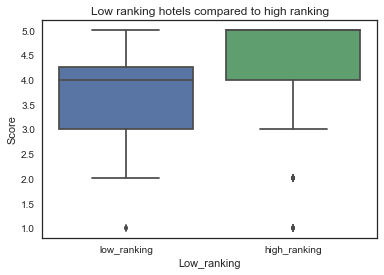

In [129]:
sns.plt.title('Low ranking hotels compared to high ranking')
low_ranking = df['Low_ranking']
low_ranking_converted = []
for l in low_ranking:
    if l == 1:
        l = 'low_ranking'
        low_ranking_converted.append(l)
    elif l == 0:
        l = 'high_ranking'
        low_ranking_converted.append(l)
df['Low_ranking'] = low_ranking_converted
sns.boxplot(df['Low_ranking'], df['Score'])

In [71]:
# Using a confusion matrix to crosscheck the low rates with the hotels that regressed more slowly
from sklearn.metrics import confusion_matrix
confusion_matrix(df['Low_ranking'], df['Low_rate'])

array([[336,  24],
       [127,  17]])

In [104]:
df_2 = df['Low_rate']
lr = pd.DataFrame(df_2)
lr["Hotel_name"] = df['Hotel_name']
lr.head(150)

,Low_rate,Hotel_name
0,0,Circus Circus Hotel & Casino Las Vegas
1,0,Circus Circus Hotel & Casino Las Vegas
2,0,Circus Circus Hotel & Casino Las Vegas
3,0,Circus Circus Hotel & Casino Las Vegas
4,0,Circus Circus Hotel & Casino Las Vegas
5,0,Circus Circus Hotel & Casino Las Vegas
6,0,Circus Circus Hotel & Casino Las Vegas
7,0,Circus Circus Hotel & Casino Las Vegas
8,0,Circus Circus Hotel & Casino Las Vegas
9,0,Circus Circus Hotel & Casino Las Vegas


In [105]:
# Finding number of bad reviews per hotel
a = lr[lr['Low_rate'] > 0]

,Low_rate,Hotel_name
10,1,Circus Circus Hotel & Casino Las Vegas
12,1,Circus Circus Hotel & Casino Las Vegas
16,1,Circus Circus Hotel & Casino Las Vegas
19,1,Circus Circus Hotel & Casino Las Vegas
21,1,Circus Circus Hotel & Casino Las Vegas
23,1,Circus Circus Hotel & Casino Las Vegas
39,1,Excalibur Hotel & Casino
50,1,Monte Carlo Resort&Casino
55,1,Monte Carlo Resort&Casino
62,1,Monte Carlo Resort&Casino
